<a href="https://colab.research.google.com/github/murilo-henrique060/matematica-computacional/blob/main/Atividade%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import colorsys
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

colors = (
    'blue',
    'green',
    'gray',
    'cyan',
)

def plot(vectors = [], shapes = [], title=None, size=10, figsize=6):
  fig, ax = plt.subplots(figsize=(figsize, figsize))

  if (title is not None):
    plt.title(title)

  plt.grid(True)

  plt.axhline(0, color='black',linewidth=0.5)
  plt.axvline(0, color='black',linewidth=0.5)

  half = size/2
  half_int = int(half)

  plt.axis([-half,half,-half,half])
  plt.xticks(range(-half_int, half_int+1))
  plt.yticks(range(-half_int, half_int+1))

  for i, vector in enumerate(vectors):
    color = i % len(colors)
    ax.arrow(0,0, vector[0], vector[1], head_width=0.2, head_length=0.3, length_includes_head=True, fc=colors[color], ec=colors[color], zorder=3)

  for i, shape in enumerate(shapes):
    color = (i+1) % len(colors)
    polygon = Polygon(shape, edgecolor=colors[color], facecolor='light' + colors[color], zorder=2)
    ax.add_patch(polygon)

  plt.show()

In [ ]:
o = np.array((0, 0))

i = np.array((1, 0))
j = np.array((0, 1))

Para aplicar duas transformações em um vetor, começamos aplicando a transformação mais a direita

$$
\begin{bmatrix}
   0 & 2 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
   1 & -2 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
   x \\
   y
\end{bmatrix}
=
\begin{bmatrix}
   0 & 2 \\
   1 & 0
\end{bmatrix}
\left(
\begin{bmatrix}
   1 & -2 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
   x \\
   y
\end{bmatrix}
\right)
$$

In [ ]:
t1 = np.array([
    [0, 2],
    [1, 0]
])

t2 = np.array([
    [1, -2],
    [1, 0]
])

composite_matrix = t1 @ t2

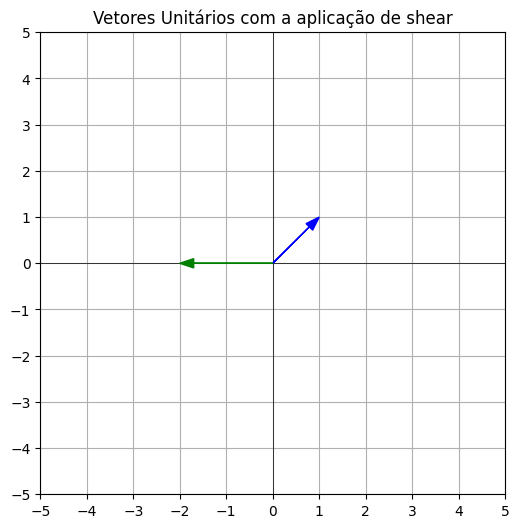

In [ ]:
newI = t2 @ i
newJ = t2 @ j

plot([newI, newJ], title="Vetores Unitários com a aplicação de shear")

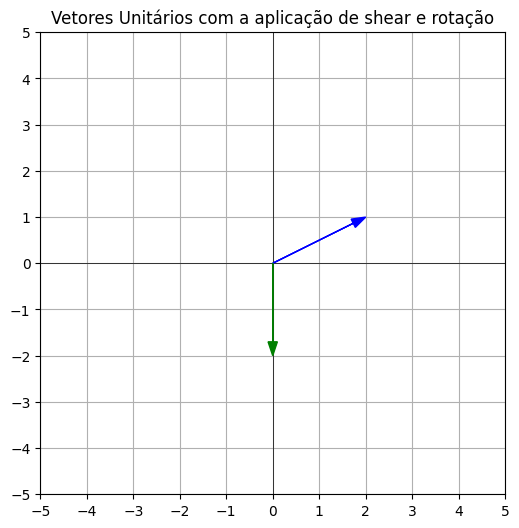

In [ ]:
newI = t1 @ newI
newJ = t1 @ newJ

plot([newI, newJ], title="Vetores Unitários com a aplicação de shear e rotação")

O determinante pode ser calculado ao se calcular a área do retângulo formado pelos vetores i e j transformados.


O cálculo do determinante revela algumas propriedades da transformação, como:
- O módulo do determinante indica o fator de escalonamento em que áreas mudam com a transformação.
- O sinal do determinate indica se há rotação dos eixos no sentido de uma nova dimensão.

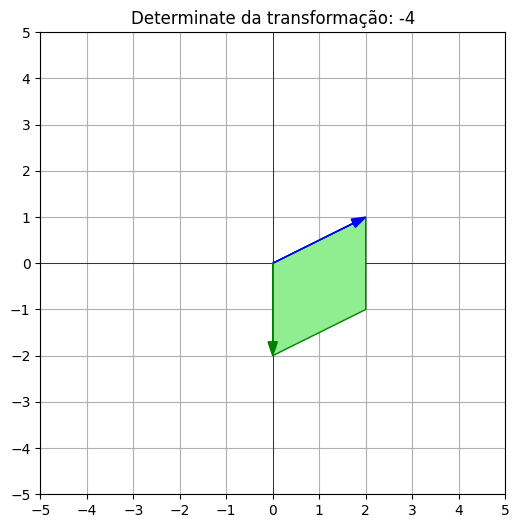

In [ ]:
determinant = np.linalg.det(composite_matrix)

det_area = [o, newI, newI+newJ, newJ]
plot([newI, newJ], [det_area], title=f"Determinate da transformação: {determinant:.0f}")

Um método para achar a matriz composta entre as duas transformações é a multiplicação entre as duas:

$$
\begin{bmatrix}
   0 & 2 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
   1 & -2 \\
   1 & 0
\end{bmatrix}
=
T
$$


Para isso podemos utilizar o destino dos vetores unitários que estão armazenados na matriz

$$
\begin{bmatrix}
   1 & -2 \\
   1 & 0
\end{bmatrix}
→
i =
\begin{bmatrix}
   1 \\
   1
\end{bmatrix}\
j =
\begin{bmatrix}
   -2 \\
   0
\end{bmatrix}
$$

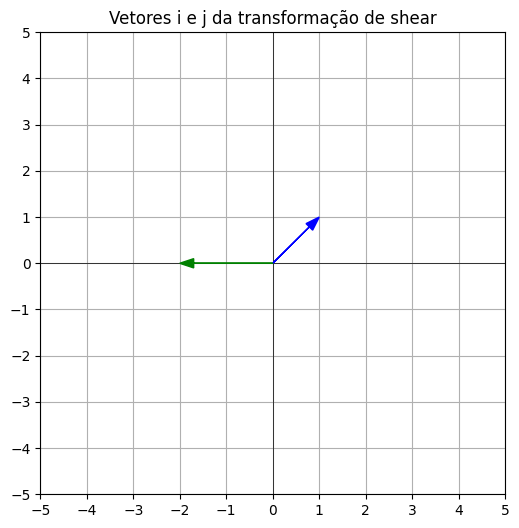

In [ ]:
t1 = np.array([
    [0, 2],
    [1, 0]
])

t2 = np.array([
    [1, -2],
    [1, 0]
])

t2_i = np.array((t2[0][0], t2[1][0]))
t2_j = np.array((t2[0][1], t2[1][1]))

plot([t2_i, t2_j], title="Vetores i e j da transformação de shear")

Aplicamos a transformação nesses vetores e remontamos a matrix:

$$
\begin{bmatrix}
   0 & 2 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
   1 \\
   1
\end{bmatrix}
=
\begin{bmatrix}
   2 \\
   1
\end{bmatrix}
\\[10mm]
$$



$$
\begin{bmatrix}
   0 & 2 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
  -2 \\
   0
\end{bmatrix}
=
\begin{bmatrix}
   0 \\
   -2
\end{bmatrix}
\\[10mm]
$$

$$
T =
\begin{bmatrix}
   2 & 0 \\
   1 & -2
\end{bmatrix}
$$


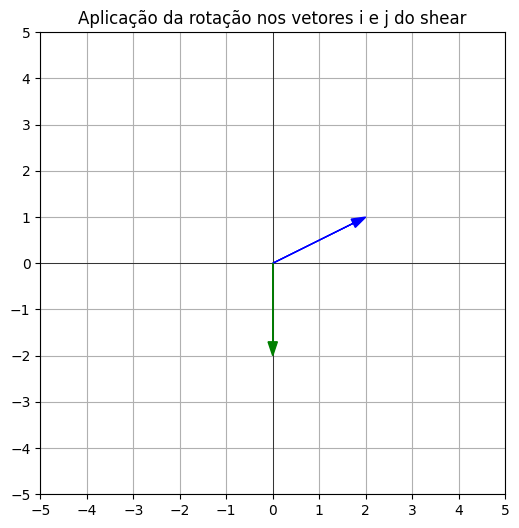

In [ ]:
new_t2_i = t1 @ t2_i
new_t2_j = t1 @ t2_j

plot([new_t2_i, new_t2_j], title="Aplicação da rotação nos vetores i e j do shear")

Aplicando o processo invertendo a ordem das matrizes:

$$
\begin{bmatrix}
   1 & -2 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
   0 & 2 \\
   1 & 0
\end{bmatrix}
=
T'
\\[10mm]
$$

$$
\begin{bmatrix}
   0 & 2 \\
   1 & 0
\end{bmatrix}
→
i =
\begin{bmatrix}
   0 \\
   1
\end{bmatrix}\
j =
\begin{bmatrix}
   2 \\
   0
\end{bmatrix}
$$

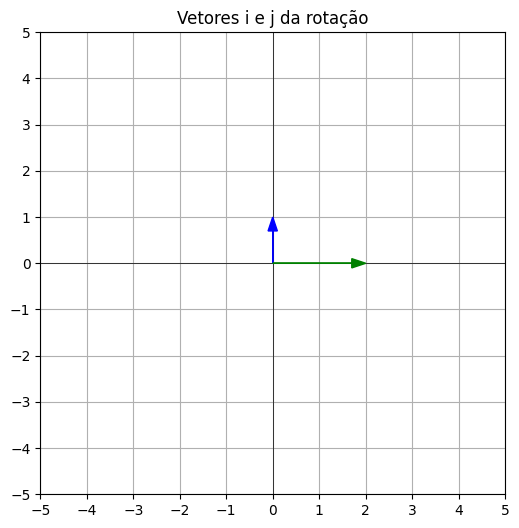

In [ ]:
t1_i = np.array((t1[0][0], t1[1][0]))
t1_j = np.array((t1[0][1], t1[1][1]))

plot([t1_i, t1_j], title="Vetores i e j da rotação")

$$
\begin{bmatrix}
   1 & -2 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
   0 \\
   1
\end{bmatrix}
=
\begin{bmatrix}
   -2 \\
   0
\end{bmatrix}
\\[10mm]
$$



$$
\begin{bmatrix}
   1 & -2 \\
   1 & 0
\end{bmatrix}
\begin{bmatrix}
  2 \\
   0
\end{bmatrix}
=
\begin{bmatrix}
   2 \\
   2
\end{bmatrix}
\\[10mm]
$$

$$
T' =
\begin{bmatrix}
   -2 & 2 \\
   1 & 2
\end{bmatrix}
$$

Assim podemos visualizar que:

$$
A \cdot B \ne B \cdot A
$$

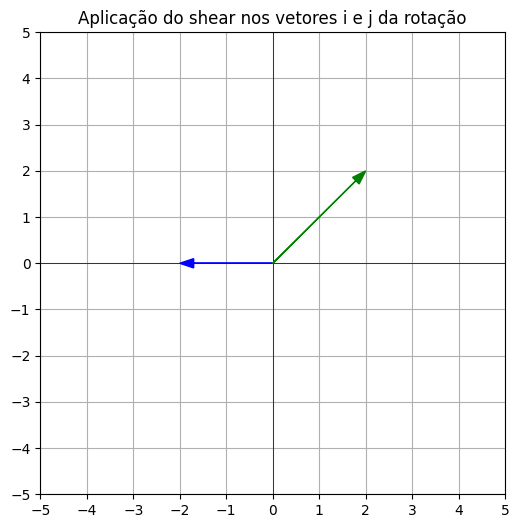

In [ ]:
new_t1_i = t2 @ t1_i
new_t1_j = t2 @ t1_j

plot([new_t1_i, new_t1_j], title="Aplicação do shear nos vetores i e j da rotação")

O produto dot entre vetores é uma operação que retorna um escalar que representa o quanto os vetores apontam na mesma direção, com valores positivos significando que apontam em direções similares, negativos que apontam em direções opostas e 0 que estão a 90° um do outro.

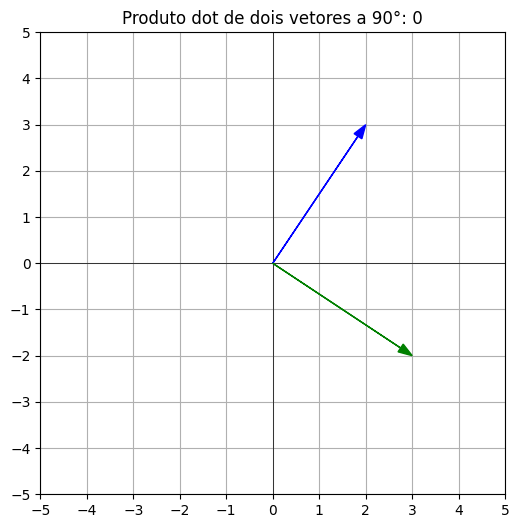

In [ ]:
vet1 = np.array((2,3))

rotation = np.array([
    [0, 1],
    [-1, 0]
])

vet2 = rotation @ vet1

dot_product = np.dot(vet1, vet2)

plot([vet1, vet2], title=f"Produto dot de dois vetores a 90°: {dot_product:.0f}")